<a href="https://colab.research.google.com/github/karan5p/AI-Research-Project-5/blob/main/5_Research_Assignment_Karan_Patel_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dependency installation
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -q bank-additional.zip
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 27.1 MB/s 
     |████████████████████████████████| 1.7 MB 14.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 61.1 MB/s 
     |████████████████████████████████| 141 kB 71.7 MB/s 
     |████████████████████████████████| 88 kB 8.4 MB/s 
     |████████████████████████████████| 3.3 MB 54.9 MB/s 
     |████████████████████████████████| 4.8 MB 63.0 MB/s 
     |████████████████████████████████| 636 kB 59.2 MB/s 
     |████████████████████████████████| 2.0 MB 47.4 MB/s 
     |████████████████████████████████| 6.8 MB 50.9 MB/s 
     |████████████████████████████████| 1.3 MB 56.3 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 

In [ ]:
#loading data
import pandas as pd
df_bank = pd.read_csv('bank-additional/bank-additional.csv', sep=";")
df_bank.drop_duplicates(inplace=True)
df_bank


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [ ]:
#5
#getting data
from pycaret.utils import enable_colab
enable_colab()
df_bank.shape


Colab mode enabled.


(4119, 21)

In [ ]:
#5
#getting data cont.
data = df_bank.sample(frac=0.9, random_state=786)
data_unseen = df_bank.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3707, 21)
Unseen Data For Predictions: (412, 21)


In [ ]:
#6
#setting up enviroment
#numpy 
import numpy as np
from pycaret.classification import *
#target value: Has the client subscribed to a term deposit?
exp_bank = setup(data = data, target = 'y', session_id = 123)
TARGET_COL = 'y'
data[TARGET_COL].value_counts(normalize='True')

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(3707, 21)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

no     0.88805
yes    0.11195
Name: y, dtype: float64

In [ ]:
#7
best = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9106,0.9398,0.5146,0.6512,0.5730,0.5239,0.5295,0.364
lr,Logistic Regression,0.9137,0.9343,0.4754,0.6898,0.5602,0.5144,0.5267,0.651
lda,Linear Discriminant Analysis,0.9136,0.9342,0.5245,0.6707,0.5846,0.5375,0.5448,0.043
lightgbm,Light Gradient Boosting Machine,0.9002,0.9283,0.4785,0.5985,0.5289,0.4740,0.4793,0.156
rf,Random Forest Classifier,0.9036,0.9244,0.3763,0.6669,0.4762,0.4278,0.4515,0.716
ada,Ada Boost Classifier,0.9067,0.9125,0.4581,0.6442,0.5317,0.4820,0.4926,0.165
et,Extra Trees Classifier,0.8975,0.8995,0.3269,0.6198,0.4251,0.3750,0.3996,0.542
knn,K Neighbors Classifier,0.8921,0.8547,0.4684,0.5496,0.5025,0.4427,0.4463,0.129
nb,Naive Bayes,0.8793,0.8167,0.4127,0.4839,0.4414,0.3749,0.3784,0.020
dt,Decision Tree Classifier,0.8797,0.7212,0.5144,0.4898,0.4986,0.4307,0.4327,0.024


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
#8.1
dt = create_model('dt')
#print(dt) redundent 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8846,0.7464,0.5667,0.5000,0.5312,0.4658,0.4669
1,0.8769,0.7488,0.5806,0.4865,0.5294,0.4592,0.4616
2,0.8846,0.7672,0.6129,0.5135,0.5588,0.4930,0.4956
3,0.8923,0.7157,0.4839,0.5556,0.5172,0.4570,0.4583
4,0.8726,0.6817,0.4333,0.4483,0.4407,0.3688,0.3689
5,0.8687,0.7085,0.5000,0.4412,0.4688,0.3942,0.3952
6,0.8649,0.7353,0.5667,0.4359,0.4928,0.4163,0.4211
7,0.8764,0.7274,0.5333,0.4706,0.5000,0.4298,0.4309
8,0.8803,0.6861,0.4333,0.4815,0.4561,0.3891,0.3898


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#8.2
gbc = create_model('gbc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9154,0.9474,0.5333,0.6667,0.5926,0.5460,0.5503
1,0.9000,0.9262,0.4839,0.6000,0.5357,0.4804,0.4839
2,0.8962,0.9428,0.5806,0.5625,0.5714,0.5124,0.5124
3,0.9269,0.9565,0.5484,0.7727,0.6415,0.6021,0.6131
4,0.9073,0.9154,0.4667,0.6364,0.5385,0.4883,0.4956
5,0.9228,0.9457,0.5667,0.7083,0.6296,0.5871,0.5917
6,0.9189,0.9399,0.6000,0.6667,0.6316,0.5862,0.5872
7,0.8958,0.9298,0.4333,0.5652,0.4906,0.4336,0.4384
8,0.9035,0.9643,0.4333,0.6190,0.5098,0.4581,0.4671


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#8.3
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9243,0.4333,0.5909,0.5000,0.4459,0.4525
1,0.9077,0.9248,0.4194,0.6842,0.5200,0.4722,0.4895
2,0.9154,0.9479,0.5484,0.6800,0.6071,0.5603,0.5644
3,0.9154,0.9470,0.4194,0.7647,0.5417,0.4994,0.5268
4,0.9112,0.9263,0.4333,0.6842,0.5306,0.4843,0.4997
5,0.9266,0.9354,0.5667,0.7391,0.6415,0.6014,0.6080
6,0.9228,0.9354,0.6000,0.6923,0.6429,0.5998,0.6017
7,0.8996,0.9221,0.3667,0.6111,0.4583,0.4068,0.4230
8,0.9189,0.9566,0.4667,0.7368,0.5714,0.5291,0.5460


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#9.1
tuned_dt = tune_model(dt)
#print(tuned_dt) redundent

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9038,0.9357,0.5333,0.5926,0.5614,0.5076,0.5085
1,0.9077,0.9008,0.4839,0.6522,0.5556,0.5053,0.5123
2,0.8962,0.9089,0.8065,0.5435,0.6494,0.5911,0.6070
3,0.9115,0.9167,0.3548,0.7857,0.4889,0.4479,0.4906
4,0.9073,0.8832,0.5667,0.6071,0.5862,0.5341,0.5345
5,0.8996,0.9106,0.5000,0.5769,0.5357,0.4798,0.4813
6,0.9189,0.8595,0.5333,0.6957,0.6038,0.5595,0.5656
7,0.8842,0.8925,0.3333,0.5000,0.4000,0.3387,0.3473
8,0.9151,0.8640,0.5000,0.6818,0.5769,0.5310,0.5388


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#9.2
tuned_gbc = tune_model(gbc)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8962,0.9349,0.5000,0.5556,0.5263,0.4682,0.4690
1,0.8923,0.9048,0.5161,0.5517,0.5333,0.4725,0.4729
2,0.9115,0.9262,0.6452,0.6250,0.6349,0.5846,0.5847
3,0.9423,0.9570,0.6452,0.8333,0.7273,0.6956,0.7027
4,0.8880,0.9304,0.4667,0.5185,0.4912,0.4285,0.4293
5,0.9305,0.9418,0.6333,0.7308,0.6786,0.6398,0.6419
6,0.9228,0.9479,0.7000,0.6562,0.6774,0.6336,0.6340
7,0.8919,0.9210,0.5000,0.5357,0.5172,0.4565,0.4568
8,0.9112,0.9584,0.4667,0.6667,0.5490,0.5015,0.5113


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#9.3
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9077,0.9274,0.4000,0.6667,0.5000,0.4526,0.4706
1,0.9115,0.9242,0.4194,0.7222,0.5306,0.4855,0.5075
2,0.9231,0.9470,0.5806,0.7200,0.6429,0.6003,0.6047
3,0.9231,0.9432,0.4516,0.8235,0.5833,0.5449,0.5748
4,0.9035,0.9310,0.3667,0.6471,0.4681,0.4194,0.4400
5,0.9228,0.9342,0.5000,0.7500,0.6000,0.5591,0.5732
6,0.9189,0.9326,0.4667,0.7368,0.5714,0.5291,0.5460
7,0.8958,0.9275,0.3667,0.5789,0.4490,0.3946,0.4072
8,0.9189,0.9546,0.4333,0.7647,0.5532,0.5123,0.5374


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


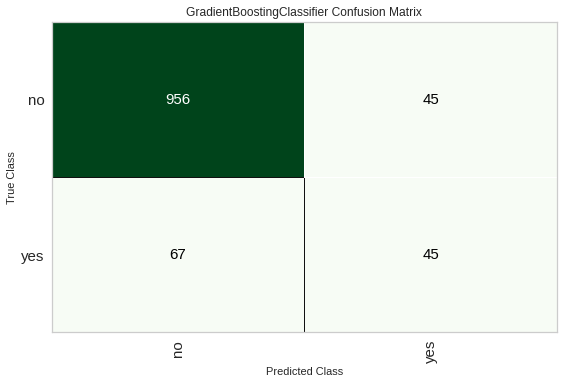

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#10.1
plot_model(tuned_gbc, plot = 'confusion_matrix')

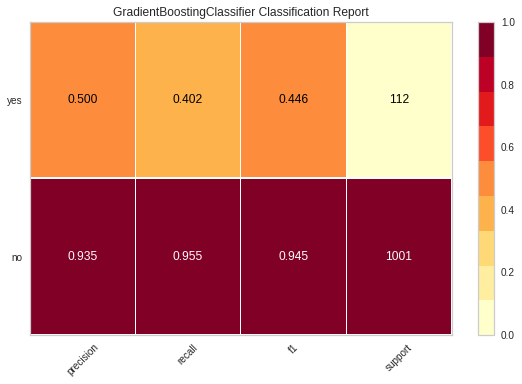

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#10.2
plot_model(tuned_gbc, plot = 'class_report')

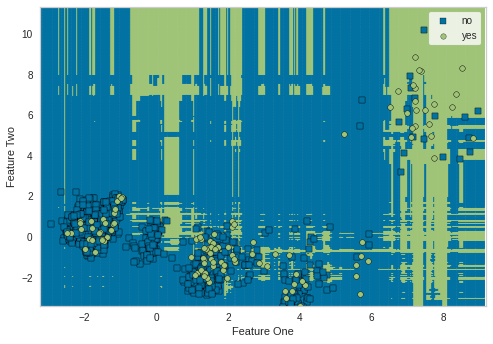

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#10.3
plot_model(tuned_gbc, plot='boundary')

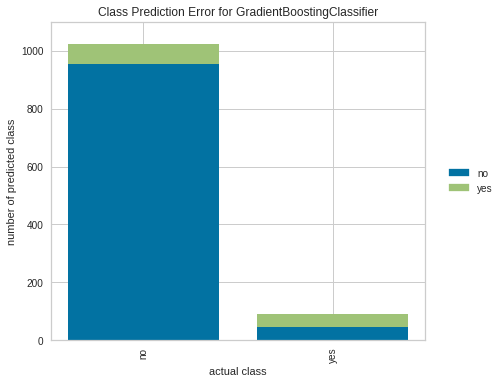

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#10.4
plot_model(tuned_gbc, plot = 'error')

In [ ]:
#10.4 cont.
evaluate_model(tuned_gbc)
#nice gui to see different types of plots

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#11
predict_model(tuned_gbc)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloadi

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8994,0.9135,0.4018,0.5,0.4455,0.3909,0.3938


,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,previous_2,previous_3,previous_4,previous_5,poutcome_failure,poutcome_nonexistent,poutcome_success,y,Label,Score
0,47.0,208.0,4.0,-1.8,92.892998,-46.200001,1.299,5099.100098,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9980
1,51.0,657.0,1.0,-2.9,92.962997,-40.799999,1.268,5076.200195,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,yes,yes,0.9188
2,33.0,153.0,1.0,1.4,93.444000,-36.099998,4.963,5228.100098,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,0.9979
3,47.0,187.0,2.0,-0.1,93.199997,-42.000000,4.153,5195.799805,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,0.9982
4,30.0,165.0,1.0,-1.8,93.875999,-40.000000,0.668,5008.700195,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.8374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,41.0,67.0,3.0,1.1,93.994003,-36.400002,4.855,5191.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,0.9985
1109,32.0,319.0,1.0,-1.8,92.892998,-46.200001,1.313,5099.100098,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9965
1110,51.0,310.0,3.0,-0.1,93.199997,-42.000000,4.076,5195.799805,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,0.9936
1111,52.0,143.0,4.0,1.4,93.917999,-42.700001,4.962,5228.100098,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,0.9982


In [ ]:
#12
final_gbc = finalize_model(tuned_gbc)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
          

In [ ]:
#12 cont.
print(final_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
#13 
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloadi

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0,0.9544,0,0,0,0,0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Label,Score
0,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,no,0.9522
1,36,self-employed,single,basic.4y,no,no,no,cellular,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,no,0.9986
2,47,blue-collar,married,basic.4y,no,yes,no,telephone,jun,thu,...,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no,no,0.9988
3,46,admin.,divorced,university.degree,no,yes,no,telephone,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,no,0.9992
4,45,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,mon,...,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,no,0.9988


In [ ]:
#14
save_model(final_gbc,'Final GBC Model 29Nov2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), model_name=Final GBC Model 29Nov2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                             learning_rate=0.15, loss='deviance',
                                             max_depth=7, max_features=1.0,
                                             max_leaf_nodes=None,
                                             min_i

In [ ]:
#15
saved_final_gbc = load_model('Final GBC Model 29Nov2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final GBC Model 29Nov2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_gbc, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                                            learning_rate=0.15, loss='deviance',
                                            max_depth=7, max_features=1.0,
                                            max_leaf_nodes

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0,0.9544,0,0,0,0,0


In [ ]:
new_prediction.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Label,Score
0,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,no,0.9522
1,36,self-employed,single,basic.4y,no,no,no,cellular,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,no,0.9986
2,47,blue-collar,married,basic.4y,no,yes,no,telephone,jun,thu,...,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no,no,0.9988
3,46,admin.,divorced,university.degree,no,yes,no,telephone,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,no,0.9992
4,45,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,mon,...,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,no,0.9988
